In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, classification_report


In [30]:


# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display the first few rows
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [31]:
# Check for missing values
print(data.isnull().sum())

# Optionally, replace zeros with NaN and then fill or drop them
data.replace(0, np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


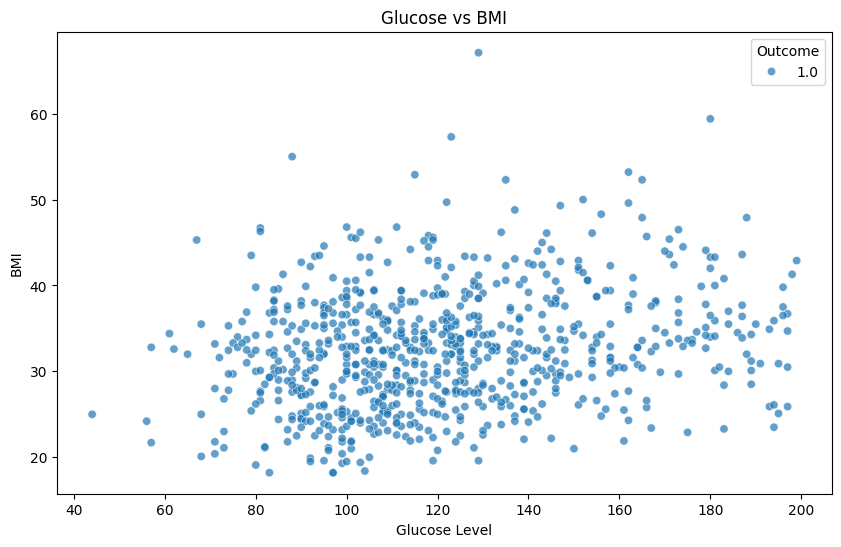

In [32]:
# Example scatter plot for two features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Glucose', y='BMI', hue='Outcome', alpha=0.7)
plt.title('Glucose vs BMI')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.show()


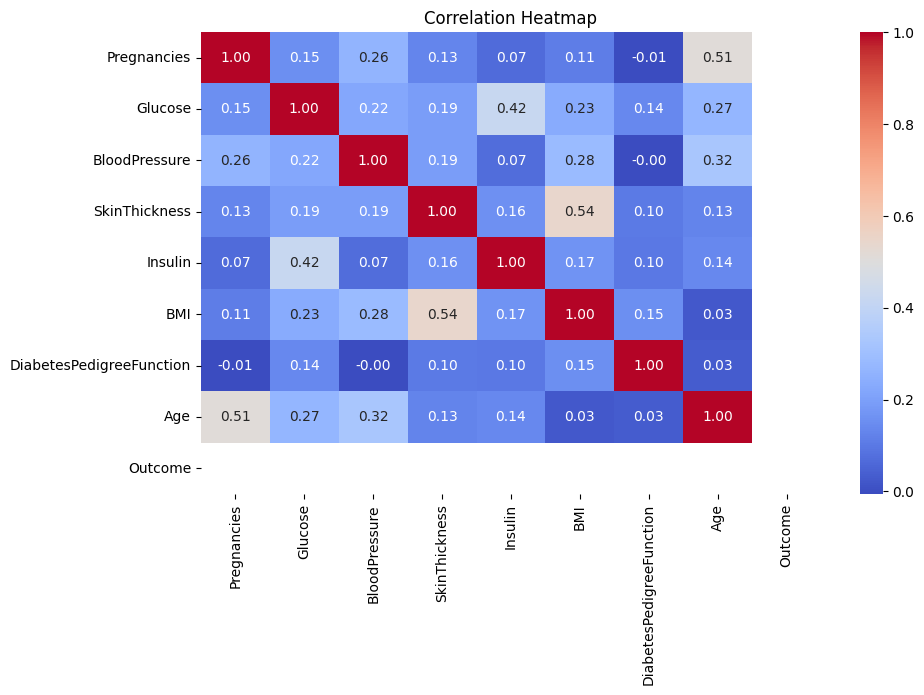

In [33]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [34]:
# Features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the class distribution
print("Train set class distribution:")
print(y_train.value_counts())
print("Test set class distribution:")
print(y_test.value_counts())

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




Train set class distribution:
Outcome
1.0    614
Name: count, dtype: int64
Test set class distribution:
Outcome
1.0    154
Name: count, dtype: int64


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
# LDA
lda = LDA()
lda.fit(X_train, y_train)

# Predictions
y_pred_lda = lda.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))
